# Matplotlib Part 2

## Bar charts and analyzing data from CSVs


Link to tutorial: [Watch here](https://youtu.be/nKxLfUrkLE8)

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
global_path = os.getcwd()
relative_path = '/data'
df_file_name = '/survey_results_public.csv'
df_schema_file_name = '/survey_results_schema.csv'

path_df = global_path + relative_path + df_file_name
path_schema = global_path + relative_path + df_schema_file_name

#Options to actually see all rows and columns
pd.set_option('display.max_columns', 85) # Can also be displayed to the number of columns
pd.set_option('display.max_rows', 20)

# Set the display option to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv(path_df, index_col = 'Respondent') # Setting index when creating dataframe
schema_df = pd.read_csv(path_schema, index_col = 'Column')
schema_df.sort_index(inplace=True)
df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,I

In [3]:
# Types of built-in styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

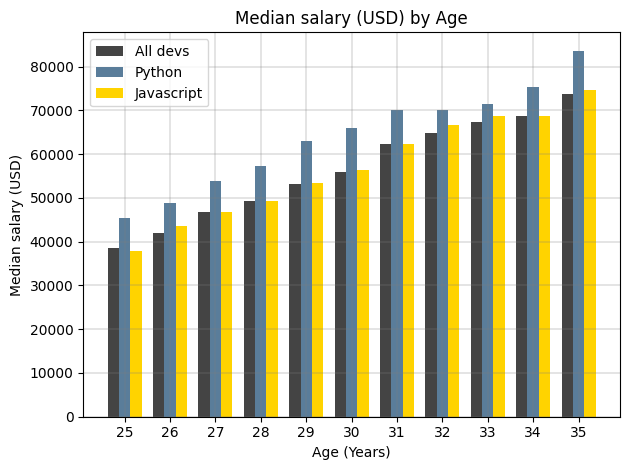

In [4]:
# To reset to default configuration
plt.rcdefaults()
# plt.xkcd() # To plot in Comic Sans

# Median Developer Salaries by Age
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

x_indexes = np.arange(len(ages_x))
width = 0.25

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
# We can pass a label argument to out plot method
# Format lines
plt.bar(x_indexes-width, dev_y, width = 0.25, color = '#444444', label = 'All devs')

# Median Python Developer Salaries by Age
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]
plt.bar(x_indexes, py_dev_y, width = 0.25, color = '#5a7d9a', label = 'Python')

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]
plt.bar(x_indexes+width, js_dev_y, width = 0.25, color = '#FFD300', label = 'Javascript')




plt.xlabel('Age (Years)')
plt.ylabel('Median salary (USD)')
plt.title('Median salary (USD) by Age')

# To use this method, you have to know the orden in which the lines were added to the plot
plt.legend()

# Method to rename the x labels
plt.xticks(ticks=x_indexes, labels=ages_x)

# Method to add grid
plt.grid(True, which = 'both', axis = 'both')
# Customizing the grid appearance
plt.grid(color='gray', linestyle='-', linewidth=0.3)

# Method to add some padding
plt.tight_layout()

# Save plot
# plt.savefig('plot.png')

# Draw plot
plt.show()

In [5]:
# Objective: create a bar chart with the most popular programming languages
df_dev = pd.DataFrame(df[['LanguageWorkedWith']])

In [6]:
# Counting nan values
df_dev.isna().sum()

LanguageWorkedWith    1314
dtype: int64

In [7]:
# Percent of nan values
100*df_dev.isna().sum()/len(df_dev)

LanguageWorkedWith   1.48
dtype: float64

In [8]:
# We can drop the nan values
df_dev.dropna(inplace=True)
len(df_dev)

87569

In [9]:
from collections import Counter
language_counter = Counter()
for i in df_dev.index:
    language_counter.update(df_dev['LanguageWorkedWith'].loc[i].split(';'))
language_counter.most_common(15)

[('JavaScript', 59219),
 ('HTML/CSS', 55466),
 ('SQL', 47544),
 ('Python', 36443),
 ('Java', 35917),
 ('Bash/Shell/PowerShell', 31991),
 ('C#', 27097),
 ('PHP', 23030),
 ('C++', 20524),
 ('TypeScript', 18523),
 ('C', 18017),
 ('Other(s):', 7920),
 ('Ruby', 7331),
 ('Go', 7201),
 ('Assembly', 5833)]

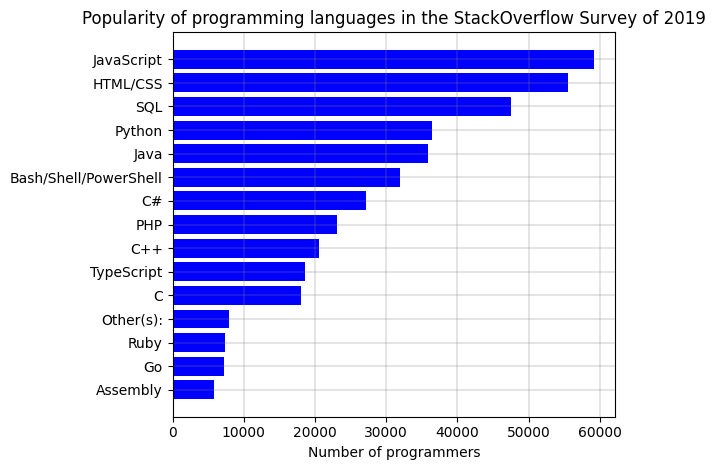

In [10]:
# To reset to default configuration
plt.rcdefaults()

languages, popularity = zip(*language_counter.most_common(15))
languages = list(languages)
languages.reverse()

popularity = list(popularity)
popularity.reverse()

x_indexes = np.arange(len(languages))
width = 0.75

plt.barh(languages, popularity, color = 'blue')

#plt.ylabel('Programming languages')
plt.xlabel('Number of programmers')
plt.title('Popularity of programming languages in the StackOverflow Survey of 2019')

# Method to rename the x labels
# plt.xticks(ticks=x_indexes, labels=languages)

# Method to add grid
plt.grid(True, which = 'both', axis = 'both')
# Customizing the grid appearance
plt.grid(color='gray', linestyle='-', linewidth=0.3)

# Method to add some padding
plt.tight_layout()

# Save plot
# plt.savefig('plot.png')

# Draw plot
plt.show()